## Import the Libraries and Modules

In [1]:
import os
import sys

In [2]:
module_path = os.path.abspath(os.path.join("../utils"))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/home/cram/dev/using-cognite-python-sdk/utils


In [3]:
import auth as cauth

## Create the Cognite Client

In [4]:
c = cauth.create_cognite_client(method="client-secret")

/home/cram/dev/using-cognite-python-sdk/.venv/lib/python3.8/site-packages/cognite/client/_cognite_client.py:85: UserWarning: You are using version 2.56.0 of the SDK, however version 2.56.1 is available. Upgrade or set the environment variable 'COGNITE_DISABLE_PYPI_VERSION_CHECK' to suppress this warning.
  self._config = ClientConfig(


## List operation

**Code Pattern**
`client.<cdf_resource_type>.list()`
where **cdf_resource_type** = { data_sets, assets, time_series, events, files, labels, sequences, relationships ... }


### List the CDF Resource types

In [5]:
c.data_sets.list()

,external_id,name,metadata,write_protected,id,created_time,last_updated_time,description
0,test_dataset8,test_dataset8,{},False,404471063348808,1657143733168,1657143733168,NaN
1,NaN,my_test_dataset,{},False,1929610961715132,1657190954116,1657190954116,NaN
2,test_dataset2,test_dataset2,{},False,2528428316884654,1657143732740,1657143732740,NaN
3,test_dataset1,test_dataset1,{},False,2748583307904895,1657143732665,1657143732665,NaN
4,test_dataset4,test_dataset4,{},False,4198465485109543,1657143732881,1657143732881,NaN
5,test_dataset7,test_dataset7,{},False,4750475368646754,1657143733093,1657143733093,NaN
6,test_dataset3,test_dataset3,{},False,5087716596235727,1657143732811,1657143732811,NaN
7,NaN,1st level,{},False,5313330929151202,1657190933319,1657190933319,NaN
8,test_dataset6,test_dataset6,{},False,5503119165422481,1657143733022,1657143733022,NaN
9,world_info,world_info,{},True,5548572851312583,1652688654772,1652688654772,NaN


In [6]:
c.assets.list(limit=5)

,external_id,name,parent_id,parent_external_id,description,metadata,source,id,created_time,last_updated_time,root_id,data_set_id,labels
0,1551417927529342,23-TAH-92539,6459961409773445,6079953337268935,VRD - PH 1STSTGCOMP DISCHARGE : TEMPERATURE AL...,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,6615943284975,1652690345913,1652690345913,2075231145010555,<NA>,NaN
1,1800536337849650,23-FT-96167,7247369845328821,3904753668320840,VRD - PH 1STSTG COMPR BAL PISTON LEAK,"{'ELC_STATUS_ID': '1225', 'RES_ID': '495164', ...",petro-tech-staging,12707299535082,1652690345913,1652690345913,2075231145010555,<NA>,NaN
2,Guam,Guam,8931637188319095,Oceania,NaN,{},NaN,13609198113115,1657142046706,1657142046706,2588735622961188,5548572851312583,[{'externalId': 'COUNTRY'}]
3,5263601374807048,23-TE-96111-04,8109972319743882,3117826349444493,VRD - PH 1STSTGGEAR 1 JOURNBRG DE,"{'ELC_STATUS_ID': '1211', 'RES_ID': '525283', ...",petro-tech-staging,17321536225065,1652690345913,1652690345913,2075231145010555,<NA>,NaN
4,6989199408991281,23-PT-92531-01,2760401877477005,5231415482805125,SOFT TAG VRD - PH 1STSTGCOMP SUCTION,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,18037117592759,1652690345913,1652690345913,2075231145010555,<NA>,NaN


In [10]:
df = c.time_series.list(limit=None).to_pandas()

In [11]:
df.shape

(409, 13)

In [13]:
c.events.list(limit=5)

,end_time,type,subtype,metadata,asset_ids,source,id,last_updated_time,created_time,start_time
0,1468108800000,Workpackage,VAL,"{'source': 'akerbp-cdp', 'sourceId': '66745706...",[8628084799352049],akerbp-cdp,4920516620586718,1653486834301,1653486834301,<NA>
1,<NA>,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '29', 'WORKPACK...",[8628084799352049],akerbp-cdp,1718750633905430,1653486835160,1653486835160,0
2,0,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '33', 'WORKPACK...",[8628084799352049],akerbp-cdp,2338996459974391,1653486834974,1653486834974,0
3,<NA>,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '33', 'WORKPACK...",[8628084799352049],akerbp-cdp,3239587593224470,1653486835488,1653486835488,0
4,<NA>,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '173', 'WORKPAC...",[8628084799352049],akerbp-cdp,3338669023839735,1653486835385,1653486835385,0


In [14]:
c.files.list(limit=5)

,name,asset_ids,id,uploaded,uploaded_time,created_time,last_updated_time,source,mime_type,data_set_id
0,PH-ME-P-0004-001.pdf,[8628084799352049],751071820891431,True,1.657139e+12,1657139202305,1657186316980,NaN,NaN,<NA>
1,PH-ME-P-0156-002.pdf,[8628084799352049],1079820226552851,False,NaN,1657138728081,1657186317119,Discovery,application/pdf,7129880323294884
2,PH-ME-P-0156-001.pdf,[8628084799352049],1183954407347440,False,NaN,1657138727341,1657186317296,Discovery,application/pdf,7129880323294884
3,PH-ME-P-0153-001.pdf,[8628084799352049],1191573487368640,True,1.657139e+12,1657139202316,1657186317414,NaN,NaN,<NA>
4,PH-ME-P-0003-001.pdf,[8628084799352049],1518761967810752,False,NaN,1657138728156,1657186317521,Discovery,application/pdf,7129880323294884


Similar code for listing other resource types


```
c.labels.list()
```
```
c.sequences.list()
```
```
c.relationships.list()
```


There are no labels in Publicdata, need to create some dummy may be.

In [15]:
c.labels.list(limit=5)

,external_id,name,created_time,data_set_id
0,ROTATING_EQUIPMENT,Rotating equipment,1657191050979,1929610961715132
1,PUMP,pump,1657191050979,1929610961715132
2,REGION,REGION,1657141671698,<NA>
3,COUNTRY,COUNTRY,1657141671698,<NA>
4,BALTIC,BALTIC,1657143421635,<NA>


In [16]:
c.sequences.list(limit=5)

,id,external_id,metadata,columns,created_time,last_updated_time,data_set_id,name,description
0,2357839693666680,my_sequence,{},"[{'externalId': 'user', 'description': 'some d...",1657191142856,1657191142856,1929610961715132,NaN,NaN
1,7408721814460392,world_table,{},"[{'externalId': 'name', 'valueType': 'STRING',...",1657147108981,1657147401929,5548572851312583,world_table,Table containing data about countries of world


In [17]:
c.relationships.list(limit=5)

,external_id,source_external_id,source_type,target_external_id,target_type,confidence,data_set_id,created_time,last_updated_time,labels
0,norway_neighbours_1,Norway,asset,Sweden,asset,1.0,5548572851312583,1657144744739,1657144744739,[]
1,norway_neighbours_2,Norway,asset,Finland,asset,1.0,5548572851312583,1657144744739,1657144744739,[]
2,flow_12,asset1,asset,asset2,asset,0.1,1929610961715132,1657191250639,1657191250639,[]
3,flow_21,asset2,asset,asset1,asset,0.1,1929610961715132,1657191250639,1657191250639,[]


### Filter the list results

using label filter

In [18]:
from cognite.client.data_classes import LabelFilter

In [19]:
c.assets.list(labels=LabelFilter(contains_all=["REGION"]),limit=5)

,external_id,name,parent_id,parent_external_id,data_set_id,metadata,labels,id,created_time,last_updated_time,root_id
0,Asia,Asia,2588735622961188,world,5548572851312583,{},[{'externalId': 'REGION'}],236590052314835,1657141889284,1657141889284,2588735622961188
1,Americas,Americas,2588735622961188,world,5548572851312583,{},[{'externalId': 'REGION'}],4173589749830972,1657141889284,1657141889284,2588735622961188
2,Africa,Africa,2588735622961188,world,5548572851312583,{},[{'externalId': 'REGION'}],4907736717916777,1657141889284,1657141889284,2588735622961188
3,Europe,Europe,2588735622961188,world,5548572851312583,{},[{'externalId': 'REGION'}],8838703337775797,1657141889284,1657141889284,2588735622961188
4,Oceania,Oceania,2588735622961188,world,5548572851312583,{},[{'externalId': 'REGION'}],8931637188319095,1657141889284,1657141889284,2588735622961188


In [20]:
from cognite.client.data_classes import LabelFilter

In [21]:
c.assets.list(labels=LabelFilter(contains_any=["NORDIC", "BALTIC"]))

,external_id,name,parent_id,parent_external_id,data_set_id,metadata,labels,id,created_time,last_updated_time,root_id
0,Finland,Finland,8838703337775797,Europe,5548572851312583,{},"[{'externalId': 'NORDIC'}, {'externalId': 'COU...",463227429782697,1657142046706,1657143221164,2588735622961188
1,Latvia,Latvia,8838703337775797,Europe,5548572851312583,{},"[{'externalId': 'BALTIC'}, {'externalId': 'COU...",1392719804475359,1657142046706,1657143453429,2588735622961188
2,Norway,Norway,8838703337775797,Europe,5548572851312583,{},"[{'externalId': 'COUNTRY'}, {'externalId': 'NO...",1533556516688641,1657142046706,1657143169966,2588735622961188
3,Iceland,Iceland,8838703337775797,Europe,5548572851312583,{},"[{'externalId': 'NORDIC'}, {'externalId': 'COU...",2332598526922536,1657142046706,1657143191343,2588735622961188
4,Lithuania,Lithuania,8838703337775797,Europe,5548572851312583,{},"[{'externalId': 'COUNTRY'}, {'externalId': 'BA...",2531966459168055,1657142046706,1657143463755,2588735622961188
5,Denmark,Denmark,8838703337775797,Europe,5548572851312583,{},"[{'externalId': 'NORDIC'}, {'externalId': 'COU...",5664579792451258,1657142046706,1657143196911,2588735622961188
6,Sweden,Sweden,8838703337775797,Europe,5548572851312583,{},"[{'externalId': 'NORDIC'}, {'externalId': 'COU...",6785118727024861,1657142046706,1657143217128,2588735622961188
7,Estonia,Estonia,8838703337775797,Europe,5548572851312583,{},"[{'externalId': 'BALTIC'}, {'externalId': 'COU...",8731896918477333,1657142046706,1657143445788,2588735622961188


using metadata filter

In [22]:
# First get some metadata keys to inspect
c.assets.list(limit=5).to_pandas()['metadata'][4]

{'ELC_STATUS_ID': '1211',
 'SOURCE_DB': 'workmate',
 'SOURCE_TABLE': 'wmate_dba.wmt_tag',
 'WMT_AREA_ID': '1600',
 'WMT_CATEGORY_ID': '1152',
 'WMT_CONTRACTOR_ID': '1686',
 'WMT_FUNC_CODE_ID': '11275',
 'WMT_LOCATION_ID': '1004',
 'WMT_SYSTEM_ID': '4440',
 'WMT_TAG_CREATED_DATE': '2013-04-23 10:10:49',
 'WMT_TAG_CRITICALLINE': 'N',
 'WMT_TAG_DESC': 'SOFT TAG VRD - PH 1STSTGCOMP SUCTION',
 'WMT_TAG_GLOBALID': '1000000000285061',
 'WMT_TAG_HISTORYREQUIRED': 'Y',
 'WMT_TAG_ID': '696236',
 'WMT_TAG_ID_ANCESTOR': '346285',
 'WMT_TAG_ISACTIVE': '1',
 'WMT_TAG_ISOWNEDBYPROJECT': '0',
 'WMT_TAG_MAINID': '681760',
 'WMT_TAG_NAME': '23-PT-92531-01',
 'WMT_TAG_UPDATED_BY': '1001',
 'WMT_TAG_UPDATED_DATE': '2015-10-09 11:56:25'}

In [23]:
# Get the assets list satisfying metadata filter
c.assets.list(metadata={'ELC_STATUS_ID': '1211'},limit=5)

,external_id,name,parent_id,parent_external_id,description,metadata,source,id,created_time,last_updated_time,root_id
0,1551417927529342,23-TAH-92539,6459961409773445,6079953337268935,VRD - PH 1STSTGCOMP DISCHARGE : TEMPERATURE AL...,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,6615943284975,1652690345913,1652690345913,2075231145010555
1,5263601374807048,23-TE-96111-04,8109972319743882,3117826349444493,VRD - PH 1STSTGGEAR 1 JOURNBRG DE,"{'ELC_STATUS_ID': '1211', 'RES_ID': '525283', ...",petro-tech-staging,17321536225065,1652690345913,1652690345913,2075231145010555
2,6989199408991281,23-PT-92531-01,2760401877477005,5231415482805125,SOFT TAG VRD - PH 1STSTGCOMP SUCTION,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,18037117592759,1652690345913,1652690345913,2075231145010555
3,8486796384181384,23-YI-96120-02,481322793259164,2227583191295299,SOFT TAG VRD - PH 1STSTGGEAR 2 JOURNBRG DE,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,43703862122077,1652690345913,1652690345913,2075231145010555
4,1251158239225724,23-YE-96134-01,458991222737140,6191827428964450,VRD - PH 1STSTG MOTOR JOURN BRG DE,"{'ELC_STATUS_ID': '1211', 'RES_ID': '531118', ...",petro-tech-staging,54823530117950,1652690345913,1652690345913,2075231145010555


Other filters

In [24]:
c.data_sets.list()

,external_id,name,metadata,write_protected,id,created_time,last_updated_time,description
0,test_dataset8,test_dataset8,{},False,404471063348808,1657143733168,1657143733168,NaN
1,NaN,my_test_dataset,{},False,1929610961715132,1657190954116,1657190954116,NaN
2,test_dataset2,test_dataset2,{},False,2528428316884654,1657143732740,1657143732740,NaN
3,test_dataset1,test_dataset1,{},False,2748583307904895,1657143732665,1657143732665,NaN
4,test_dataset4,test_dataset4,{},False,4198465485109543,1657143732881,1657143732881,NaN
5,test_dataset7,test_dataset7,{},False,4750475368646754,1657143733093,1657143733093,NaN
6,test_dataset3,test_dataset3,{},False,5087716596235727,1657143732811,1657143732811,NaN
7,NaN,1st level,{},False,5313330929151202,1657190933319,1657190933319,NaN
8,test_dataset6,test_dataset6,{},False,5503119165422481,1657143733022,1657143733022,NaN
9,world_info,world_info,{},True,5548572851312583,1652688654772,1652688654772,NaN


In [25]:
c.data_sets.list(write_protected=True)

,external_id,name,metadata,write_protected,id,created_time,last_updated_time,description
0,world_info,world_info,{},True,5548572851312583,1652688654772,1652688654772,NaN
1,VAL/FILES/PNIDS,Valhall system 23 P&IDs,{},True,7129880323294884,1657137379832,1657137379832,Piping and instrumentation diagrams from Valha...


In [26]:
c.labels.list(limit=5, name="NORDIC")

,external_id,name,created_time
0,NORDIC,NORDIC,1657142354433


In [27]:
c.assets.list(root=True)

,external_id,name,data_set_id,metadata,id,created_time,last_updated_time,root_id,description,source,labels
0,root,root,1929610961715132,{},1844171062314831,1657191377914,1657191377914,1844171062314831,NaN,NaN,NaN
1,6687602007296940,Aker BP,<NA>,{},2075231145010555,1652690345473,1652690345473,2075231145010555,Aker BP,petro-tech-staging,NaN
2,NaN,asset1,1929610961715132,{},2337497105272481,1657191074668,1657191074668,2337497105272481,NaN,NaN,NaN
3,houston.00. Support systems.Reverse osmosis,Reverse osmosis,<NA>,"{'_replicatedInternalId': '1536954437306151', ...",2436442502710362,1652690345473,1652690345473,2436442502710362,NaN,petro-tech-staging,NaN
4,world,Global,5548572851312583,{},2588735622961188,1657141408621,1657141436065,2588735622961188,World asset used as root for all countries,NaN,NaN
5,4093404255107247,Vulkan Control Room,<NA>,{'source': 'Point cloud model of control room ...,3326391988716762,1652690345473,1652690345473,3326391988716762,NaN,petro-tech-staging,NaN
6,NaN,asset2,1929610961715132,{},3850461732700104,1657191074668,1657191074668,3850461732700104,NaN,NaN,NaN
7,NaN,my_pump,1929610961715132,{},7097748601985097,1657191300482,1657191300482,7097748601985097,NaN,NaN,[{'externalId': 'PUMP'}]


In [28]:
c.time_series.list(is_step=True,limit=5)

,id,external_id,name,is_string,metadata,unit,asset_id,is_step,description,security_categories,created_time,last_updated_time
0,538281328503707,pi:160779,VAL_23-TIC-92504:Control Module:YR,False,"{'engunits': 'degC', 'span': '100', 'instrumen...",degC,1082331072451557,True,PH 1stStgSuctCool Gas Out Working Setpoint,[],1652691565976,1652691565976
1,1174343826015831,pi:160497,VAL_23-LIC-92521:Control Module:YR,False,"{'engunits': '%', 'span': '100', 'instrumentta...",%,3406961665372670,True,PH 1stStgSuctScrubber Level Working Setpoint,[],1652691565833,1652691565833
2,1962887782733034,pi:160670,VAL_23-PIC-96153:Control Module:YR,False,"{'engunits': 'barg', 'span': '100', 'instrumen...",barg,4409852944550960,True,PH 1stStg Comp Inner Seal Working Setpoint,[],1652691565976,1652691565976
3,3058371000953714,pi:160833,VAL_23-TIC-96147:Control Module:YR,False,"{'engunits': 'degC', 'span': '100', 'instrumen...",degC,4317393151088205,True,PH 1stStg Comp Seal Gas Working Setpoint,[],1652691566061,1652691566061
4,4700569124916891,pi:160842,VAL_23-TIC-96148:Control Module:YR,False,"{'engunits': 'degC', 'span': '100', 'instrumen...",degC,7129541495976649,True,PH 1stStg Comp Seal Gas Working Setpoint,[],1652691566033,1652691566033


In [29]:
c.events.list(start_time={"max": 1500000000},limit=5)

,start_time,type,subtype,metadata,asset_ids,source,id,last_updated_time,created_time,end_time
0,0,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '29', 'WORKPACK...",[8628084799352049],akerbp-cdp,1718750633905430,1653486835160,1653486835160,<NA>
1,0,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '33', 'WORKPACK...",[8628084799352049],akerbp-cdp,2338996459974391,1653486834974,1653486834974,0
2,0,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '33', 'WORKPACK...",[8628084799352049],akerbp-cdp,3239587593224470,1653486835488,1653486835488,<NA>
3,0,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '173', 'WORKPAC...",[8628084799352049],akerbp-cdp,3338669023839735,1653486835385,1653486835385,<NA>
4,0,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '46', 'WORKPACK...",[8628084799352049],akerbp-cdp,4232071347650845,1653486834510,1653486834510,<NA>


### Iterate over the list

In [31]:
for data_set in c.data_sets:
    print(data_set.id) # do something with the data_set

404471063348808
1929610961715132
2528428316884654
2748583307904895
4198465485109543
4750475368646754
5087716596235727
5313330929151202
5503119165422481
5548572851312583
6072660243794946
6099467114847970
7129880323294884
8144932939408110


When List is too big, then use the **chunk_size** parameter to get the list in chunks

In [32]:
for data_set_list in c.data_sets(chunk_size=5):
    print([x.name for x in data_set_list]) # do something with the list

['test_dataset8', 'my_test_dataset', 'test_dataset2', 'test_dataset1', 'test_dataset4']
['test_dataset7', 'test_dataset3', '1st level', 'test_dataset6', 'world_info']
['test_dataset9', '2nd level', 'Valhall system 23 P&IDs', 'test_dataset5']


## Searching in CDF

- Search the CDF resource types
- Filter the search results

**Code Pattern**

`client.<cdf_resource_type>.search()`

### Fuzzy Search on one field

In [33]:
c.assets.search(name="23-HA-9114",limit=5)

,external_id,name,parent_id,parent_external_id,description,metadata,source,id,created_time,last_updated_time,root_id
0,5345363121325760,23-HA-9114,264396548249584,2513266419866445,VRD - 1ST STAGE DISCHARGE COOLER 1,"{'ELC_STATUS_ID': '1211', 'RES_ID': '531303', ...",petro-tech-staging,7640884189698369,1652690345913,1652690345913,2075231145010555
1,1305599545806638,23-HA-9115,264396548249584,2513266419866445,VRD - 1ST STAGE DISCHARGE COOLER 2,"{'ELC_STATUS_ID': '1211', 'RES_ID': '531303', ...",petro-tech-staging,2096576847847256,1652690345913,1652690345913,2075231145010555
2,8820916275841408,23-VA-9114,6990494653502625,2499711953216311,VRD - 1ST STAGE COMPRESSOR MARINE VANE SEPARATOR,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,8140508315193333,1652690345913,1652690345913,2075231145010555
3,1308676097270399,23-GO-9114,6990494653502625,2499711953216311,VRD - 1ST STAGE COMPPRESSOR ENCLOSURE INLET AI...,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,7778925754685498,1652690345913,1652690345913,2075231145010555
4,2861239574637735,23-HA-9103,264396548249584,2513266419866445,VRD - 1ST STAGE SUCTION COOLER,"{'ELC_STATUS_ID': '1211', 'RES_ID': '531306', ...",petro-tech-staging,7130743143880734,1652690345913,1652690345913,2075231145010555


In [34]:
c.time_series.search(name="VAL_23-PDT-92501",limit=5)

,id,external_id,name,is_string,metadata,asset_id,is_step,description,security_categories,created_time,last_updated_time,unit
0,4818990839686907,pi:160627,VAL_23-PDT-92501:X.Value,False,"{'engunits': '', 'span': '100', 'instrumenttag...",5967896194324220,False,PH 1stStgSuctCool Gas In ESDV,[],1652691565997,1652691565997,NaN
1,6188194244606939,pi:160628,VAL_23-PDT-92502:X.Value,False,"{'engunits': '', 'span': '100', 'instrumenttag...",7471162505095358,False,PH 1stStgSuctCool Tubes,[],1652691566065,1652691566065,NaN
2,7216986682219383,pi:160629,VAL_23-PDT-92522:X.Value,False,"{'engunits': '', 'span': '100', 'instrumenttag...",4444753312154191,False,PH 1stStgSuctScrubber Gas Out,[],1652691565806,1652691565806,NaN
3,6140167627533222,pi:160630,VAL_23-PDT-92530:X.Value,False,"{'engunits': 'mbar', 'span': '100', 'instrumen...",3548217158224788,False,PH 1stStgComp Suct Str,[],1652691566120,1652691566120,mbar
4,8829108639562606,pi:160631,VAL_23-PDT-92534:X.Value,False,"{'engunits': 'mbar', 'span': '100', 'instrumen...",5633660863241718,False,PH 1stStgComp Suction,[],1652691565833,1652691565833,mbar


In [35]:
c.files.search(name=".pdf")

,name,asset_ids,id,uploaded,uploaded_time,created_time,last_updated_time,source,mime_type,data_set_id
0,PH-ME-P-0004-001.pdf,[8628084799352049],751071820891431,True,1.657139e+12,1657139202305,1657186316980,NaN,NaN,<NA>
1,PH-ME-P-0156-002.pdf,[8628084799352049],1079820226552851,False,NaN,1657138728081,1657186317119,Discovery,application/pdf,7129880323294884
2,PH-ME-P-0156-001.pdf,[8628084799352049],1183954407347440,False,NaN,1657138727341,1657186317296,Discovery,application/pdf,7129880323294884
3,PH-ME-P-0153-001.pdf,[8628084799352049],1191573487368640,True,1.657139e+12,1657139202316,1657186317414,NaN,NaN,<NA>
4,PH-ME-P-0003-001.pdf,[8628084799352049],1518761967810752,False,NaN,1657138728156,1657186317521,Discovery,application/pdf,7129880323294884
5,PH-25578-P-4110006-001.pdf,[8628084799352049],1747542106535044,True,1.657139e+12,1657139204394,1657186317619,NaN,NaN,<NA>
6,PH-ME-P-0151-001.pdf,[8628084799352049],2461583640351869,False,NaN,1657138728710,1657186317755,Discovery,application/pdf,7129880323294884
7,PH-ME-P-0004-001.pdf,[8628084799352049],4068089648831735,False,NaN,1657138727912,1657186318220,Discovery,application/pdf,7129880323294884
8,PH-ME-P-0156-002.pdf,[8628084799352049],4370412061385245,True,1.657139e+12,1657139203958,1657186318433,NaN,NaN,<NA>
9,PH-25578-P-4110119-001.pdf,[8628084799352049],4384251463911539,True,1.657139e+12,1657139202296,1657186318534,NaN,NaN,<NA>


Similarly for sequences and events

`c.sequences.search(name="some name")`

`c.events.search(description="some description")`

### Multi-field fuzzy search

In [36]:
c.assets.search(query="Discharge Cooler",limit=5)

,external_id,name,parent_id,parent_external_id,description,metadata,source,id,created_time,last_updated_time,root_id
0,5345363121325760,23-HA-9114,264396548249584,2513266419866445,VRD - 1ST STAGE DISCHARGE COOLER 1,"{'ELC_STATUS_ID': '1211', 'RES_ID': '531303', ...",petro-tech-staging,7640884189698369,1652690345913,1652690345913,2075231145010555
1,1305599545806638,23-HA-9115,264396548249584,2513266419866445,VRD - 1ST STAGE DISCHARGE COOLER 2,"{'ELC_STATUS_ID': '1211', 'RES_ID': '531303', ...",petro-tech-staging,2096576847847256,1652690345913,1652690345913,2075231145010555
2,2513266419866445,23-XX-9105,1653819182973212,4518112062673878,VRD - 1ST STAGE SUCTION/DISCHARGE COOLER SKID,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,264396548249584,1652690345913,1652690345913,2075231145010555
3,8477639309770579,23-FAH-92537-02,8226970065761122,546230921280339,SOFT TAG VRD - PH 1STSTGCOMP DISCHARGE,"{'ELC_STATUS_ID': '1225', 'SOURCE_DB': 'workma...",petro-tech-staging,8245251868071311,1652690345913,1652690345913,2075231145010555
4,7766485700169656,23-FAL-92537-02,8226970065761122,546230921280339,SOFT TAG VRD - PH 1STSTGCOMP DISCHARGE,"{'ELC_STATUS_ID': '1225', 'SOURCE_DB': 'workma...",petro-tech-staging,1074322106114650,1652690345913,1652690345913,2075231145010555


### Exact search on one field (e.g. name, description etc)

In [37]:
c.assets.search(filter={"name": "23-TIC-92604B"})

,external_id,name,parent_id,parent_external_id,description,metadata,source,id,created_time,last_updated_time,root_id
0,8327962938361538,23-TIC-92604B,6717120213191743,1150715783816357,SOFT TAG VRD - PH 1STSTGDISCCOOL GAS OUT,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,275122214623185,1652690345913,1652690345913,2075231145010555


get all timeseries for the above asset

In [38]:
c.time_series.search(filter={"asset_ids":[275122214623185]})

,id,external_id,name,is_string,metadata,unit,asset_id,is_step,description,security_categories,created_time,last_updated_time
0,1656322122531749,pi:191091,VAL_23-TIC-92604B:Z.X.Value,False,"{'engunits': 'degC', 'span': '100', 'instrumen...",degC,275122214623185,False,PH 1stStgDiscCool Gas Out Measured Value,[],1652691565722,1652691565722
1,4549593794670966,pi:191153,VAL_23-TIC-92604B:Z.Y.Value,False,"{'engunits': 'degC', 'span': '100', 'instrumen...",degC,275122214623185,False,PH 1stStgDiscCool Gas Out Output,[],1652691566081,1652691566081


In [40]:
c.events.list()[0].type

'Workpackage'

In [39]:
# First get an example type to filter on
example_type = c.events.list()[0].type
# Filter the events of that type
c.events.search(filter={"type":example_type})

,start_time,type,subtype,metadata,asset_ids,source,id,last_updated_time,created_time,end_time
0,0,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '46', 'WORKPACK...",[8628084799352049],akerbp-cdp,4232071347650845,1653486834510,1653486834510,<NA>
1,0,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '46', 'WORKPACK...",[8628084799352049],akerbp-cdp,4698129675269061,1653486835061,1653486835061,0
2,0,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '173', 'WORKPAC...",[8628084799352049],akerbp-cdp,8960141083088418,1653486835259,1653486835259,0
3,0,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '173', 'WORKPAC...",[8628084799352049],akerbp-cdp,3338669023839735,1653486835385,1653486835385,<NA>
4,0,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '33', 'WORKPACK...",[8628084799352049],akerbp-cdp,3239587593224470,1653486835488,1653486835488,<NA>
...,...,...,...,...,...,...,...,...,...,...
56,1388534400000,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '199', 'WORKPAC...",[8628084799352049],akerbp-cdp,509827910479048,1653486839317,1653486839317,1419984000000
57,1427932800000,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '30', 'WORKPACK...",[8628084799352049],akerbp-cdp,1805855227033497,1653486839692,1653486839692,1433919600000
58,1431561600000,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '10', 'WORKPACK...",[8628084799352049],akerbp-cdp,5614681408877962,1653486839892,1653486839892,1432710000000
59,1474243200000,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '133', 'WORKPAC...",[8628084799352049],akerbp-cdp,7466770765245410,1653486840178,1653486840178,1513234800000


### Multiple filters in search function

In [41]:
c.assets.list(limit=5,data_set_external_ids=['world_info'])

,external_id,name,parent_id,parent_external_id,data_set_id,metadata,labels,id,created_time,last_updated_time,root_id
0,Guam,Guam,8931637188319095,Oceania,5548572851312583,{},[{'externalId': 'COUNTRY'}],13609198113115,1657142046706,1657142046706,2588735622961188
1,Pakistan,Pakistan,236590052314835,Asia,5548572851312583,{},[{'externalId': 'COUNTRY'}],49182915132056,1657142046706,1657142046706,2588735622961188
2,Grenada,Grenada,4173589749830972,Americas,5548572851312583,{},[{'externalId': 'COUNTRY'}],142604714568204,1657142046706,1657142046706,2588735622961188
3,South Sudan,South Sudan,4907736717916777,Africa,5548572851312583,{},[{'externalId': 'COUNTRY'}],165452779546482,1657142046706,1657142046706,2588735622961188
4,United States of America,United States of America,4173589749830972,Americas,5548572851312583,{},[{'externalId': 'COUNTRY'}],176151800127725,1657142046706,1657142046706,2588735622961188


In [42]:
c.assets.list(root=True)

,external_id,name,data_set_id,metadata,id,created_time,last_updated_time,root_id,description,source,labels
0,root,root,1929610961715132,{},1844171062314831,1657191377914,1657191377914,1844171062314831,NaN,NaN,NaN
1,6687602007296940,Aker BP,<NA>,{},2075231145010555,1652690345473,1652690345473,2075231145010555,Aker BP,petro-tech-staging,NaN
2,NaN,asset1,1929610961715132,{},2337497105272481,1657191074668,1657191074668,2337497105272481,NaN,NaN,NaN
3,houston.00. Support systems.Reverse osmosis,Reverse osmosis,<NA>,"{'_replicatedInternalId': '1536954437306151', ...",2436442502710362,1652690345473,1652690345473,2436442502710362,NaN,petro-tech-staging,NaN
4,world,Global,5548572851312583,{},2588735622961188,1657141408621,1657141436065,2588735622961188,World asset used as root for all countries,NaN,NaN
5,4093404255107247,Vulkan Control Room,<NA>,{'source': 'Point cloud model of control room ...,3326391988716762,1652690345473,1652690345473,3326391988716762,NaN,petro-tech-staging,NaN
6,NaN,asset2,1929610961715132,{},3850461732700104,1657191074668,1657191074668,3850461732700104,NaN,NaN,NaN
7,NaN,my_pump,1929610961715132,{},7097748601985097,1657191300482,1657191300482,7097748601985097,NaN,NaN,[{'externalId': 'PUMP'}]


In [44]:
c.assets.search(name="Af",filter={"parent_ids": [2588735622961188]})

,external_id,name,parent_id,parent_external_id,data_set_id,metadata,labels,id,created_time,last_updated_time,root_id
0,Africa,Africa,2588735622961188,world,5548572851312583,{},[{'externalId': 'REGION'}],4907736717916777,1657141889284,1657141889284,2588735622961188


### Filter asset search using Label Filter

In [45]:
from cognite.client.data_classes import AssetFilter

In [46]:
c.assets.search(name="America",filter=AssetFilter(labels=LabelFilter(contains_all=["COUNTRY"])),limit=5)

,external_id,name,parent_id,parent_external_id,data_set_id,metadata,labels,id,created_time,last_updated_time,root_id
0,United States of America,United States of America,4173589749830972,Americas,5548572851312583,{},[{'externalId': 'COUNTRY'}],176151800127725,1657142046706,1657142046706,2588735622961188
1,American Samoa,American Samoa,8931637188319095,Oceania,5548572851312583,{},[{'externalId': 'COUNTRY'}],3487534080968138,1657142046706,1657142046706,2588735622961188
2,South Africa,South Africa,4907736717916777,Africa,5548572851312583,{},[{'externalId': 'COUNTRY'}],1214346152534671,1657142046706,1657142046706,2588735622961188


In [47]:
c.assets.search(name="America",filter=AssetFilter(labels=LabelFilter(contains_all=["REGION"])),limit=5)

,external_id,name,parent_id,parent_external_id,data_set_id,metadata,labels,id,created_time,last_updated_time,root_id
0,Americas,Americas,2588735622961188,world,5548572851312583,{},[{'externalId': 'REGION'}],4173589749830972,1657141889284,1657141889284,2588735622961188
1,Africa,Africa,2588735622961188,world,5548572851312583,{},[{'externalId': 'REGION'}],4907736717916777,1657141889284,1657141889284,2588735622961188


## Retrieve the CDF resource types and data

### Code Pattern
`client.<cdf_resource_type>.retrieve()`

`client.<cdf_resource_type>.retrieve_multiple()`

### Retrieve the CDF resource types

single item - using id

In [48]:
c.data_sets.list()

,external_id,name,metadata,write_protected,id,created_time,last_updated_time,description
0,test_dataset8,test_dataset8,{},False,404471063348808,1657143733168,1657143733168,NaN
1,NaN,my_test_dataset,{},False,1929610961715132,1657190954116,1657190954116,NaN
2,test_dataset2,test_dataset2,{},False,2528428316884654,1657143732740,1657143732740,NaN
3,test_dataset1,test_dataset1,{},False,2748583307904895,1657143732665,1657143732665,NaN
4,test_dataset4,test_dataset4,{},False,4198465485109543,1657143732881,1657143732881,NaN
5,test_dataset7,test_dataset7,{},False,4750475368646754,1657143733093,1657143733093,NaN
6,test_dataset3,test_dataset3,{},False,5087716596235727,1657143732811,1657143732811,NaN
7,NaN,1st level,{},False,5313330929151202,1657190933319,1657190933319,NaN
8,test_dataset6,test_dataset6,{},False,5503119165422481,1657143733022,1657143733022,NaN
9,world_info,world_info,{},True,5548572851312583,1652688654772,1652688654772,NaN


In [49]:
# id of dataset
c.data_sets.retrieve(id=5548572851312583)

,value
external_id,world_info
name,world_info
write_protected,True
id,5548572851312583
created_time,1652688654772
last_updated_time,1652688654772


In [51]:
c.time_series.retrieve(id=1656322122531749)

,value
id,1656322122531749
external_id,pi:191091
name,VAL_23-TIC-92604B:Z.X.Value
is_string,False
unit,degC
asset_id,275122214623185
is_step,False
description,PH 1stStgDiscCool Gas Out Measured Value
security_categories,[]
created_time,1652691565722


In [52]:
# id of timeseries
c.datapoints.retrieve(id=1656322122531749, start="8w-ago", end="now")

,pi:191091
2022-05-12 12:03:18.636,35.167999
2022-05-12 12:11:15.328,34.438000
2022-05-12 12:11:27.340,34.326000
2022-05-12 12:11:37.333,34.241001
2022-05-12 12:11:45.312,34.157001
...,...
2022-05-18 11:43:16.300,34.803001
2022-05-18 11:43:26.302,34.747002
2022-05-18 11:43:59.335,34.775002
2022-05-18 11:44:46.332,34.747002


In [54]:
# Get an example sequence id
c.sequences.list()

,id,external_id,metadata,columns,created_time,last_updated_time,data_set_id,name,description
0,2357839693666680,my_sequence,{},"[{'externalId': 'user', 'description': 'some d...",1657191142856,1657191142856,1929610961715132,NaN,NaN
1,7408721814460392,world_table,{},"[{'externalId': 'name', 'valueType': 'STRING',...",1657147108981,1657147401929,5548572851312583,world_table,Table containing data about countries of world


In [55]:
# Get all rows for the sequence
c.sequences.data.retrieve(id=7408721814460392, start=0, end=None)

,name,alpha-2,alpha-3,iso_3166-2,region,sub-region,intermediate-region,country-code,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,ISO 3166-2:AF,Asia,Southern Asia,NaN,4.0,142.0,34.0,NaN
1,Åland Islands,AX,ALA,ISO 3166-2:AX,Europe,Northern Europe,NaN,248.0,150.0,154.0,NaN
2,Albania,AL,ALB,ISO 3166-2:AL,Europe,Southern Europe,NaN,8.0,150.0,39.0,NaN
3,Algeria,DZ,DZA,ISO 3166-2:DZ,Africa,Northern Africa,NaN,12.0,2.0,15.0,NaN
4,American Samoa,AS,ASM,ISO 3166-2:AS,Oceania,Polynesia,NaN,16.0,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,ISO 3166-2:WF,Oceania,Polynesia,NaN,876.0,9.0,61.0,NaN
245,Western Sahara,EH,ESH,ISO 3166-2:EH,Africa,Northern Africa,NaN,732.0,2.0,15.0,NaN
246,Yemen,YE,YEM,ISO 3166-2:YE,Asia,Western Asia,NaN,887.0,142.0,145.0,NaN
247,Zambia,ZM,ZMB,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,894.0,2.0,202.0,14.0


single item - using external_id

In [56]:
c.data_sets.retrieve(external_id = "world_info")

,value
external_id,world_info
name,world_info
write_protected,True
id,5548572851312583
created_time,1652688654772
last_updated_time,1652688654772


multiple items - using ids

In [57]:
c.data_sets.list()

,external_id,name,metadata,write_protected,id,created_time,last_updated_time,description
0,test_dataset8,test_dataset8,{},False,404471063348808,1657143733168,1657143733168,NaN
1,NaN,my_test_dataset,{},False,1929610961715132,1657190954116,1657190954116,NaN
2,test_dataset2,test_dataset2,{},False,2528428316884654,1657143732740,1657143732740,NaN
3,test_dataset1,test_dataset1,{},False,2748583307904895,1657143732665,1657143732665,NaN
4,test_dataset4,test_dataset4,{},False,4198465485109543,1657143732881,1657143732881,NaN
5,test_dataset7,test_dataset7,{},False,4750475368646754,1657143733093,1657143733093,NaN
6,test_dataset3,test_dataset3,{},False,5087716596235727,1657143732811,1657143732811,NaN
7,NaN,1st level,{},False,5313330929151202,1657190933319,1657190933319,NaN
8,test_dataset6,test_dataset6,{},False,5503119165422481,1657143733022,1657143733022,NaN
9,world_info,world_info,{},True,5548572851312583,1652688654772,1652688654772,NaN


In [58]:
c.data_sets.retrieve_multiple(ids=[5548572851312583, 7129880323294884])

,external_id,name,metadata,write_protected,id,created_time,last_updated_time,description
0,world_info,world_info,{},True,5548572851312583,1652688654772,1652688654772,NaN
1,VAL/FILES/PNIDS,Valhall system 23 P&IDs,{},True,7129880323294884,1657137379832,1657137379832,Piping and instrumentation diagrams from Valha...


multiple items - using external_ids

In [60]:
c.data_sets.retrieve_multiple(external_ids=["test_dataset1", "test_dataset2","my_important_dataset"], ignore_unknown_ids=True)

,external_id,name,metadata,write_protected,id,created_time,last_updated_time
0,test_dataset1,test_dataset1,{},False,2748583307904895,1657143732665,1657143732665
1,test_dataset2,test_dataset2,{},False,2528428316884654,1657143732740,1657143732740


In [61]:
from datetime import datetime
# Don't put a long datetime range, as it'll fetch all the raw datapoints, which can be huge
c.datapoints.retrieve(external_id=['pi:163657','pi:163658'],start=datetime(2018,1,1),end=datetime(2018,1,2))

,pi:163657,pi:163658
2018-01-01 00:00:02.134,16.818953,108.452278
2018-01-01 00:00:04.165,NaN,108.460518
2018-01-01 00:00:05.150,16.825666,NaN
2018-01-01 00:00:06.150,16.818953,NaN
2018-01-01 00:00:07.150,16.825666,108.470818
...,...,...
2018-01-01 23:59:52.167,16.583963,111.599907
2018-01-01 23:59:54.167,16.592356,NaN
2018-01-01 23:59:55.167,16.577250,NaN
2018-01-01 23:59:56.152,16.583963,NaN


### Retrieve all items related to an asset

In [62]:
# get the asset object for "23-TT-92604B"
asset_obj = c.assets.retrieve(id = 6717120213191743)

In [63]:
asset_obj

,value
external_id,1150715783816357
name,23-TT-92604B
parent_id,1464710065609534
parent_external_id,6895991969886325
description,VRD - PH 1STSTGDISCCOOL COOLMED IN
source,petro-tech-staging
id,6717120213191743
created_time,1652690345913
last_updated_time,1652690345913
root_id,2075231145010555


Asset Subtree

In [64]:
c.assets.retrieve_subtree(id = 6717120213191743)

,external_id,name,parent_id,parent_external_id,description,metadata,source,id,created_time,last_updated_time,root_id
0,1150715783816357,23-TT-92604B,1464710065609534,6895991969886325,VRD - PH 1STSTGDISCCOOL COOLMED IN,"{'ELC_STATUS_ID': '1212', 'SOURCE_DB': 'workma...",petro-tech-staging,6717120213191743,1652690345913,1652690345913,2075231145010555
1,8327962938361538,23-TIC-92604B,6717120213191743,1150715783816357,SOFT TAG VRD - PH 1STSTGDISCCOOL GAS OUT,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,275122214623185,1652690345913,1652690345913,2075231145010555


Children

In [65]:
asset_obj.children()

,external_id,name,parent_id,parent_external_id,description,metadata,source,id,created_time,last_updated_time,root_id
0,8327962938361538,23-TIC-92604B,6717120213191743,1150715783816357,SOFT TAG VRD - PH 1STSTGDISCCOOL GAS OUT,"{'ELC_STATUS_ID': '1211', 'SOURCE_DB': 'workma...",petro-tech-staging,275122214623185,1652690345913,1652690345913,2075231145010555


Parent

In [66]:
asset_obj.parent()

,value
external_id,6895991969886325
name,230900
parent_id,8814282509408373
parent_external_id,3111454725058294
description,GAS COMPRESSION AND RE-INJECTION ON PH
source,petro-tech-staging
id,1464710065609534
created_time,1652690345913
last_updated_time,1652690345913
root_id,2075231145010555


Events

In [68]:
# get the asset object for "VAL"
asset_obj = c.assets.retrieve(id = 8628084799352049)

In [70]:
asset_obj.events(limit=-1)

,end_time,type,subtype,metadata,asset_ids,source,id,last_updated_time,created_time,start_time
0,1468108800000,Workpackage,VAL,"{'source': 'akerbp-cdp', 'sourceId': '66745706...",[8628084799352049],akerbp-cdp,4920516620586718,1653486834301,1653486834301,<NA>
1,<NA>,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '29', 'WORKPACK...",[8628084799352049],akerbp-cdp,1718750633905430,1653486835160,1653486835160,0
2,0,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '33', 'WORKPACK...",[8628084799352049],akerbp-cdp,2338996459974391,1653486834974,1653486834974,0
3,<NA>,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '33', 'WORKPACK...",[8628084799352049],akerbp-cdp,3239587593224470,1653486835488,1653486835488,0
4,<NA>,Workpackage,VAL,"{'WORKPACKAGE_NOOFWORKORDERS': '173', 'WORKPAC...",[8628084799352049],akerbp-cdp,3338669023839735,1653486835385,1653486835385,0
...,...,...,...,...,...,...,...,...,...,...
2270,1604016000000,Workorder,VAL,"{'MODPROJECT_NUMBER': '', 'MODPROJECT_TITLE': ...",[8628084799352049],akerbp-cdp,7768994677813912,1653485992245,1653485992245,1601535600000
2271,1606694400000,Workorder,VAL,"{'MODPROJECT_NUMBER': '', 'MODPROJECT_TITLE': ...",[8628084799352049],akerbp-cdp,8581228881805374,1653485992362,1653485992362,1604214000000
2272,1606694400000,Workorder,VAL,"{'MODPROJECT_NUMBER': '', 'MODPROJECT_TITLE': ...",[8628084799352049],akerbp-cdp,8933149662462413,1653485992611,1653485992611,1604214000000
2273,1609286400000,Workorder,VAL,"{'MODPROJECT_NUMBER': '', 'MODPROJECT_TITLE': ...",[8628084799352049],akerbp-cdp,621193315980017,1653485992845,1653485992845,1606806000000


Files

In [71]:
asset_obj.files()

,name,asset_ids,id,uploaded,uploaded_time,created_time,last_updated_time,source,mime_type,data_set_id
0,PH-ME-P-0004-001.pdf,[8628084799352049],751071820891431,True,1.657139e+12,1657139202305,1657186316980,NaN,NaN,<NA>
1,PH-ME-P-0156-002.pdf,[8628084799352049],1079820226552851,False,NaN,1657138728081,1657186317119,Discovery,application/pdf,7129880323294884
2,PH-ME-P-0156-001.pdf,[8628084799352049],1183954407347440,False,NaN,1657138727341,1657186317296,Discovery,application/pdf,7129880323294884
3,PH-ME-P-0153-001.pdf,[8628084799352049],1191573487368640,True,1.657139e+12,1657139202316,1657186317414,NaN,NaN,<NA>
4,PH-ME-P-0003-001.pdf,[8628084799352049],1518761967810752,False,NaN,1657138728156,1657186317521,Discovery,application/pdf,7129880323294884
5,PH-25578-P-4110006-001.pdf,[8628084799352049],1747542106535044,True,1.657139e+12,1657139204394,1657186317619,NaN,NaN,<NA>
6,PH-ME-P-0151-001.pdf,[8628084799352049],2461583640351869,False,NaN,1657138728710,1657186317755,Discovery,application/pdf,7129880323294884
7,Processed-PH-25578-P-4110010-001.svg,[8628084799352049],2932681251867345,False,NaN,1657138728310,1657186317839,NaN,image/svg+xml,7129880323294884
8,Processed-PH-25578-P-4110006-001.svg,[8628084799352049],3564843746006736,True,1.657139e+12,1657139203618,1657186317938,NaN,NaN,<NA>
9,Processed-PH-ME-P-0156-001.svg,[8628084799352049],3760564866377817,True,1.657139e+12,1657139203311,1657186318036,NaN,NaN,<NA>


Sequences

In [72]:
asset_obj.sequences()

""


Timeseries

In [73]:
# get the asset object for "23-TIC-92604B"
asset_obj = c.assets.retrieve(id = 275122214623185)

In [74]:
asset_obj.time_series()

,id,external_id,name,is_string,metadata,unit,asset_id,is_step,description,security_categories,created_time,last_updated_time
0,1656322122531749,pi:191091,VAL_23-TIC-92604B:Z.X.Value,False,"{'engunits': 'degC', 'span': '100', 'instrumen...",degC,275122214623185,False,PH 1stStgDiscCool Gas Out Measured Value,[],1652691565722,1652691565722
1,4549593794670966,pi:191153,VAL_23-TIC-92604B:Z.Y.Value,False,"{'engunits': 'degC', 'span': '100', 'instrumen...",degC,275122214623185,False,PH 1stStgDiscCool Gas Out Output,[],1652691566081,1652691566081


### Retrieve data

#### Retrieve Raw Data

In [75]:
# Don't put a long datetime range, as it'll fetch all the raw datapoints, which can be huge for Raw datapoints
c.datapoints.retrieve(external_id=['pi:163657','pi:163658'],start=datetime(2018,1,1),end=datetime(2018,1,2))

,pi:163657,pi:163658
2018-01-01 00:00:02.134,16.818953,108.452278
2018-01-01 00:00:04.165,NaN,108.460518
2018-01-01 00:00:05.150,16.825666,NaN
2018-01-01 00:00:06.150,16.818953,NaN
2018-01-01 00:00:07.150,16.825666,108.470818
...,...,...
2018-01-01 23:59:52.167,16.583963,111.599907
2018-01-01 23:59:54.167,16.592356,NaN
2018-01-01 23:59:55.167,16.577250,NaN
2018-01-01 23:59:56.152,16.583963,NaN


#### Retrieve Aggregated data

In [76]:
c.datapoints.retrieve_dataframe(external_id=['pi:163657','pi:163658'],
                    start="10w-ago",
                    end="now",
                    aggregates=["average","sum"],
                    granularity="1h")

,pi:163657|average,pi:163657|sum,pi:163658|average,pi:163658|sum
2022-04-28 13:00:00,16.713103,5064.538034,109.288355,33005.735161
2022-04-28 14:00:00,16.708859,5296.700098,109.331558,34331.515480
2022-04-28 15:00:00,16.700356,5244.573118,109.285127,34756.388367
2022-04-28 16:00:00,16.716874,5450.104986,109.560103,35173.109093
2022-04-28 17:00:00,16.689366,5341.154654,109.521024,32962.196716
...,...,...,...,...
2022-05-18 07:00:00,16.731111,4969.146566,111.002618,37299.651596
2022-05-18 08:00:00,16.726266,4900.742834,110.087182,33464.016510
2022-05-18 09:00:00,16.724146,5167.323284,110.040654,34449.877930
2022-05-18 10:00:00,16.729456,4884.852074,109.924852,35394.915047


Retrieve latest datapoint before a particular time (last or any past time point)

In [77]:
c.datapoints.retrieve_latest(external_id='pi:163657', before="5w-ago")[0]

,value
2022-05-18 11:45:38.328,16.570536


#### Retrieve Sequence rows

In [79]:
c.sequences.list()

,id,external_id,metadata,columns,created_time,last_updated_time,data_set_id,name,description
0,2357839693666680,my_sequence,{},"[{'externalId': 'user', 'description': 'some d...",1657191142856,1657191142856,1929610961715132,NaN,NaN
1,7408721814460392,world_table,{},"[{'externalId': 'name', 'valueType': 'STRING',...",1657147108981,1657147401929,5548572851312583,world_table,Table containing data about countries of world


In [80]:
c.sequences.data.retrieve_dataframe(id=7408721814460392, start=0, end=100) # end=None to fetch all rows, can use a limit e.g. end=100

,name,alpha-2,alpha-3,iso_3166-2,region,sub-region,intermediate-region,country-code,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,ISO 3166-2:AF,Asia,Southern Asia,NaN,4.0,142.0,34.0,NaN
1,Åland Islands,AX,ALA,ISO 3166-2:AX,Europe,Northern Europe,NaN,248.0,150.0,154.0,NaN
2,Albania,AL,ALB,ISO 3166-2:AL,Europe,Southern Europe,NaN,8.0,150.0,39.0,NaN
3,Algeria,DZ,DZA,ISO 3166-2:DZ,Africa,Northern Africa,NaN,12.0,2.0,15.0,NaN
4,American Samoa,AS,ASM,ISO 3166-2:AS,Oceania,Polynesia,NaN,16.0,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,Guyana,GY,GUY,ISO 3166-2:GY,Americas,Latin America and the Caribbean,South America,328.0,19.0,419.0,5.0
96,Haiti,HT,HTI,ISO 3166-2:HT,Americas,Latin America and the Caribbean,Caribbean,332.0,19.0,419.0,29.0
97,Heard Island and McDonald Islands,HM,HMD,ISO 3166-2:HM,Oceania,Australia and New Zealand,NaN,334.0,9.0,53.0,NaN
98,Holy See,VA,VAT,ISO 3166-2:VA,Europe,Southern Europe,NaN,336.0,150.0,39.0,NaN


### Plot the data points

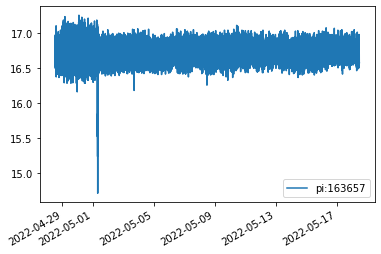

In [81]:
c.datapoints.retrieve(external_id='pi:163657', start="10w-ago", end="now").plot()

### Download files

Download files to disk

In [82]:
files_list = c.files.search(filter={"uploaded":True},limit=5)
files_list

,name,asset_ids,id,uploaded,uploaded_time,created_time,last_updated_time
0,PH-ME-P-0004-001.pdf,[8628084799352049],751071820891431,True,1657139202826,1657139202305,1657186316980
1,PH-ME-P-0153-001.pdf,[8628084799352049],1191573487368640,True,1657139203548,1657139202316,1657186317414
2,PH-25578-P-4110006-001.pdf,[8628084799352049],1747542106535044,True,1657139207950,1657139204394,1657186317619
3,Processed-PH-25578-P-4110006-001.svg,[8628084799352049],3564843746006736,True,1657139205747,1657139203618,1657186317938
4,Processed-PH-ME-P-0156-001.svg,[8628084799352049],3760564866377817,True,1657139214763,1657139203311,1657186318036


In [83]:
! mkdir files

In [84]:
c.files.download(directory="files", id=[751071820891431,1191573487368640])

Download a single file to a specific path

In [85]:
c.files.download_to_path("files/test.svg", id=3760564866377817)